# **Chapter 2 – End-to-end Machine Learning project**

*Welcome to Machine Learning Housing Corp.! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

# Get the Data

## Download the Data

In [1]:
# NumPy is for scientific computing with Python. We mainly use this to manipulate matrices.
import numpy as np
# Pandas is a kind of database tool used to load & manipulate data.
import pandas as pd

# Download the data using a .csv file link from -> https://github.com/ageron/handson-ml2
# Follow kaggle dataset -> https://www.kaggle.com/datasets/camnugent/california-housing-prices
link = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
housing = pd.read_csv(link)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [2]:
# Check no of rows & columns in the dataset
print("Shape of the data :", housing.shape)

# See all the columns in the dataset
print("All columns are :", list(housing.columns))

Shape of the data : (20640, 10)
All columns are : ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [3]:
# Check datatypes & count of not-null values in each field
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20,640 instances in the dataset, which means that it is fairly small by Machine Learning standards, but it’s perfect to get started. Notice that the `total_bedrooms` attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature. We will need to take care of this later.

All attributes are numerical, except the `ocean_proximity` field. Its type is object, so it could hold any kind of Python object, but since you loaded this data from a CSV file you know that it must be a text attribute.

In [4]:
# value_counts() works on a column & it returns frequency of each class in descending order.
# We mainly use this to count occurances of categorical data or data having few unique values.
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
# describe() works on whole DataFrame (pandas dataset object) and prints importent staistical information
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


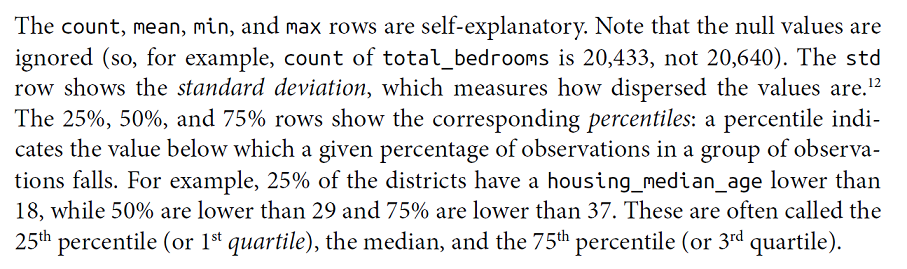

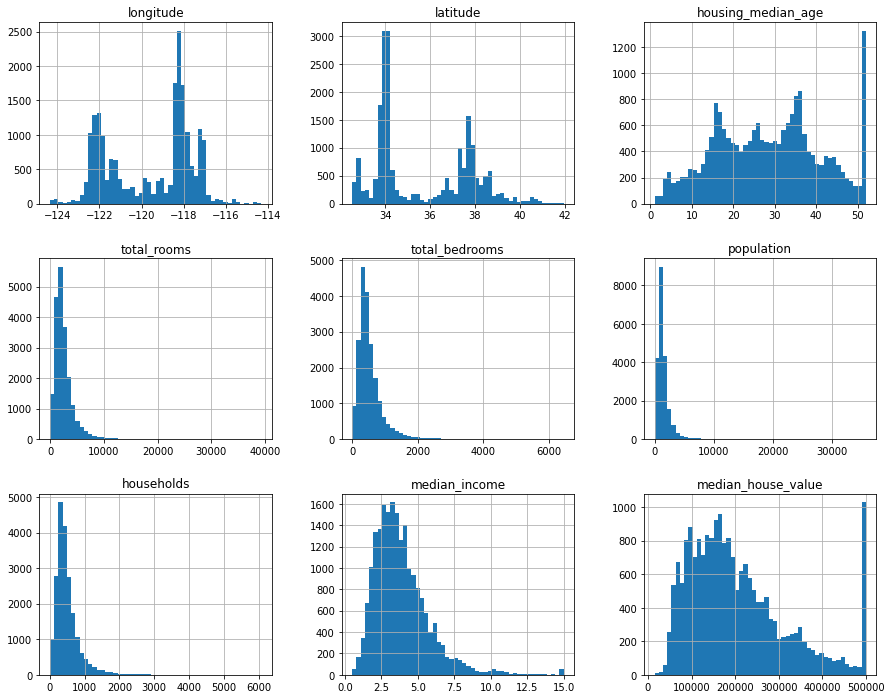

In [6]:
# Matplotlib is a very powerful module containing all kinds of data visualization tools
from matplotlib import pyplot as plt

# DataFrame.hist() creates histogram of every feature present in the DataFrame.
housing.hist(bins=50, figsize=(15,12))
plt.show()

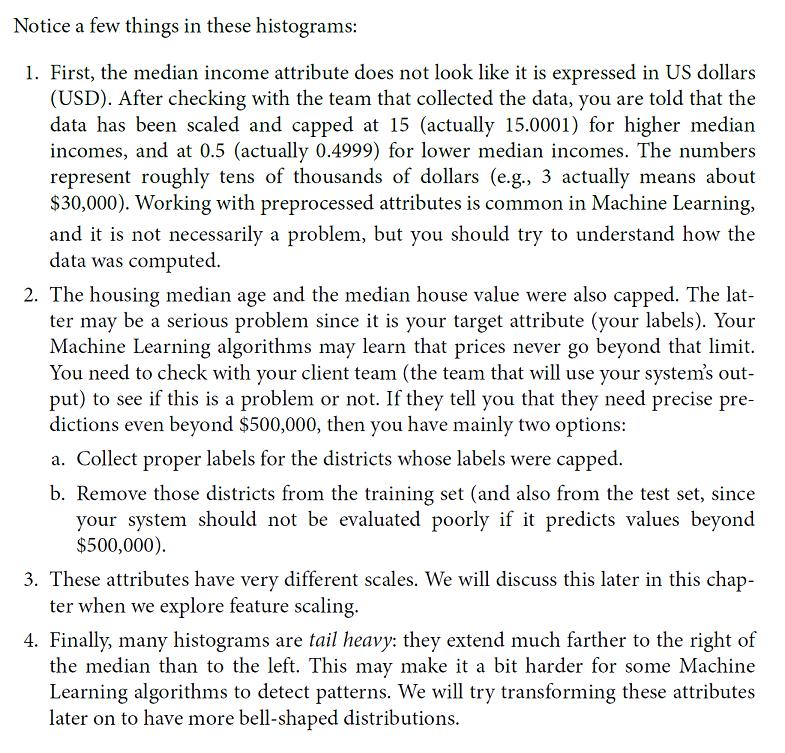

## Create a Test Set

In [7]:
from sklearn.model_selection import train_test_split

# train_test_split is a very common and standard function to split dataset into training & testing set
# Here test_size takes what fraction of dataset should be in test set.
# We can use shuffle=True to set random sample of the test set.
train_set, test_set = train_test_split(housing, test_size=0.2, shuffle=True, random_state=0)

In [8]:
print("Size of training data :", train_set.shape)
print("Size of testing data :", test_set.shape)

Size of training data : (16512, 10)
Size of testing data : (4128, 10)


In [9]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12069,-117.55,33.83,6.0,502.0,76.0,228.0,65.0,4.2386,500001.0,INLAND
15925,-122.44,37.73,52.0,2381.0,492.0,1485.0,447.0,4.3898,270000.0,NEAR BAY
11162,-118.00,33.83,26.0,1718.0,385.0,1022.0,368.0,3.9333,196100.0,<1H OCEAN
4904,-118.26,34.01,38.0,697.0,208.0,749.0,206.0,1.4653,118800.0,<1H OCEAN
4683,-118.36,34.08,52.0,2373.0,601.0,1135.0,576.0,3.1765,225000.0,<1H OCEAN


In [10]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14740,-117.05,32.58,22.0,2101.0,399.0,1551.0,371.0,4.1518,136900.0,NEAR OCEAN
10101,-117.97,33.92,32.0,2620.0,398.0,1296.0,429.0,5.7796,241300.0,<1H OCEAN
20566,-121.84,38.65,29.0,3167.0,548.0,1554.0,534.0,4.3487,200700.0,INLAND
2670,-115.60,33.20,37.0,709.0,187.0,390.0,142.0,2.4511,72500.0,INLAND
15709,-122.43,37.79,25.0,1637.0,394.0,649.0,379.0,5.0049,460000.0,NEAR BAY


In [11]:
# Resetting the indiced of bothe training & testing set
train_set.reset_index(inplace=True)
test_set.reset_index(inplace=True)

In [12]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16354 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


In [13]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               4128 non-null   int64  
 1   longitude           4128 non-null   float64
 2   latitude            4128 non-null   float64
 3   housing_median_age  4128 non-null   float64
 4   total_rooms         4128 non-null   float64
 5   total_bedrooms      4079 non-null   float64
 6   population          4128 non-null   float64
 7   households          4128 non-null   float64
 8   median_income       4128 non-null   float64
 9   median_house_value  4128 non-null   float64
 10  ocean_proximity     4128 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 354.9+ KB


Here, we can see, both train set & test set have less number of data in `total_bedrooms` field.
- Train set is lacking by 158 redords
- Test set is lacking by 49 records

# Discover and Visualize the Data to Gain Insights

## Visualizing Geographical Data

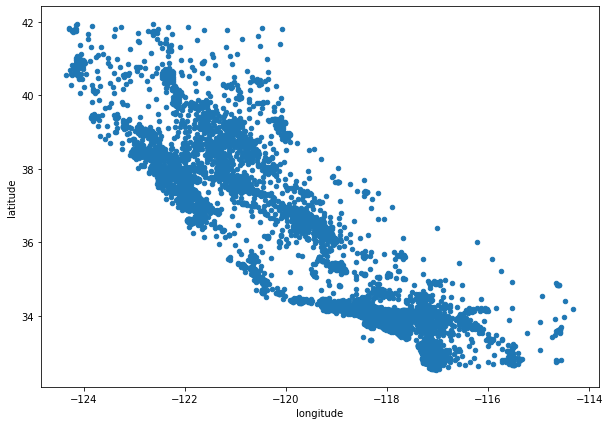

In [14]:
# This plot is called scatter-plot, where we use a dot to represent each instance of the dataset.
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10, 7))
plt.show()

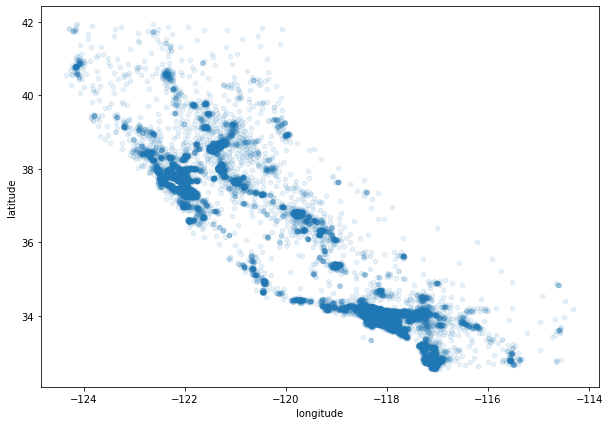

In [15]:
# To check the density of dots, we bring down the opacity of the dots to 0.1
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10, 7), alpha=0.1)
plt.show()

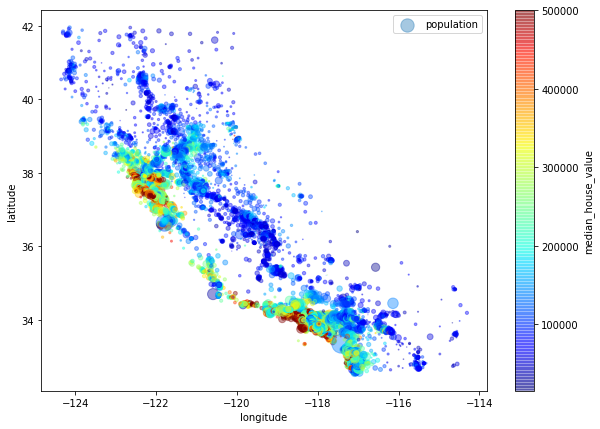

In [16]:
# In this plot, the radious of each circle represents district's population & color represents price

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.show()

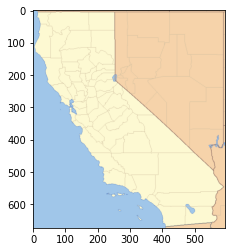

In [17]:
# To make it more understandable, lets overleap this plot on a real image of California state.

# skimage is from the image scikit-image
# To install scikit-image, use the command "pip install scikit-image"
from skimage import io

link = "https://github.com/ageron/handson-ml2/blob/master/images/end_to_end_project/california.png?raw=true"
california_image = io.imread(link)
plt.imshow(california_image)
plt.show()

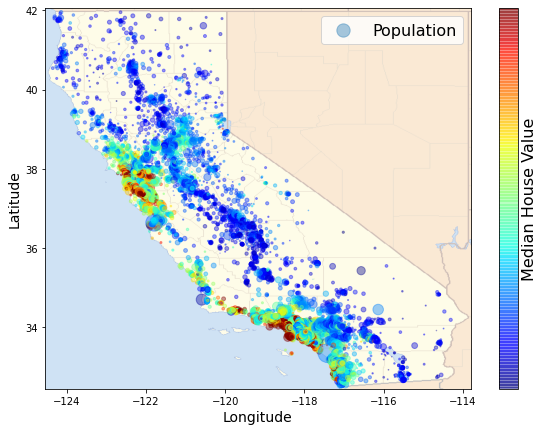

In [18]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_image, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

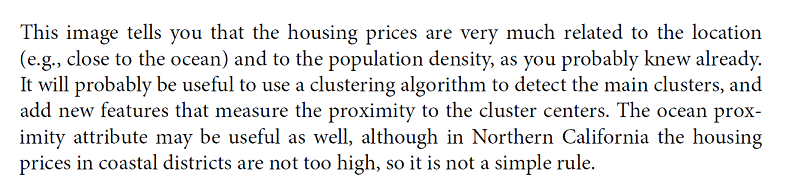

## Looking for Correlations

In [19]:
# Here we are using Pearson correlation coefficient.
# corr() autometically calculates correlation for every pair of attributes
corr_matrix = housing.corr()

In [20]:
# Lets see the most correlated features to "median_house_value"
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

We can visualize the correlation using the 2D plotting of every pair-wise feature.

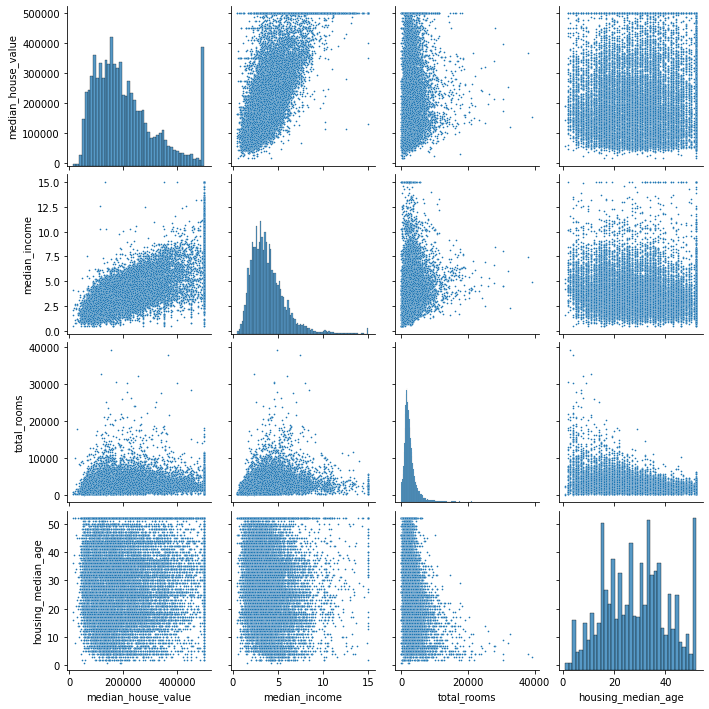

In [21]:
# Just like matplotlib, seaborn is also a data-visualization tool.
# Seaborn works upon matplotlib (seaborn is dependent on matplotlib)
# Seaborn can create some cool looking plots with lesser effort than matplotlib
import seaborn as sns

# pairplot() plots 2D scatterplot for every combinations of pair-wise features
# As we have 10 features, we will end up plotting 100 plots in a 10 x 10 grid.
# So we are plotting only those features having high correlation with "median_house_value"
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

sns.pairplot(housing[attributes], plot_kws={"s": 3})
plt.show()

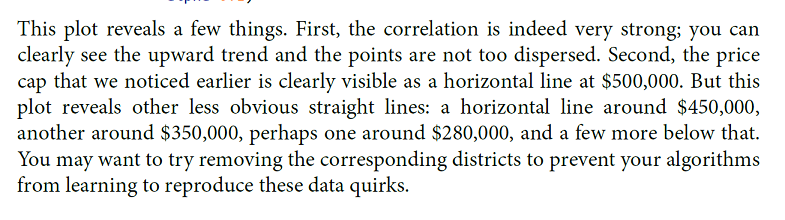

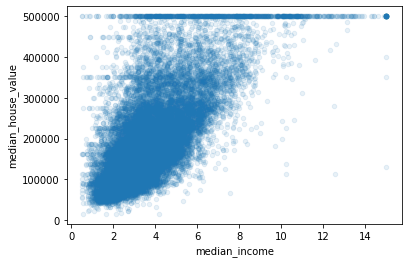

In [22]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.show()

## Experimenting with Attribute Combinations

In [23]:
# We can generate more feature by logically combining one or more features
# Like, (rooms in a single household) = (total no of rooms) / (no of households)

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [24]:
# Again calculate correlation for new features.

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

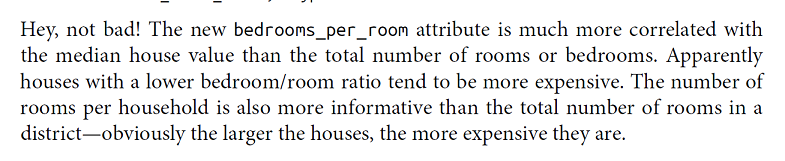

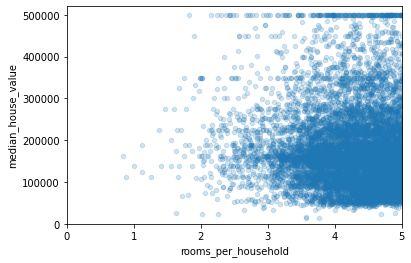

In [25]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [26]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Prepare the Data for Machine Learning Algorithms

In [27]:
# As our objective is to predict "median_house_value", we will treat it as label, 
# and this "median_house_value" will not be a part of feature anymore.
# We are seperating the label from features.

train_features = train_set.drop("median_house_value", axis=1)   # Training feature
train_labels = train_set["median_house_value"].copy()           # Training label

## Data Cleaning

In the book 3 options are listed:

```python
# option 1 : Get rid of the corresponding districts
train_features.dropna(subset=["total_bedrooms"])

# option 2 : Get rid of the whole attribute.
train_features.drop("total_bedrooms", axis=1)

# option 3 : Set the values to some value (zero, the mean, the median, etc.).
median = train_features["total_bedrooms"].median()
train_features["total_bedrooms"].fillna(median, inplace=True)
```

To demonstrate each of them, let's create a copy of the housing dataset, but keeping only the rows that contain at least one null. Then it will be easier to visualize exactly what each option does:

In [28]:
# First, seperate the rows having total_bedrooms = NaN
missing_rows = train_features[train_features.isnull().any(axis=1)]
missing_rows

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
447,13933,-117.31,34.25,29.0,4610.0,NaN,1569.0,592.0,2.7663,INLAND
454,7668,-118.08,33.92,38.0,1335.0,NaN,1011.0,269.0,3.6908,<1H OCEAN
674,1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
707,2826,-119.11,35.42,52.0,154.0,NaN,37.0,16.0,10.0263,INLAND
748,20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15920,6253,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
15996,11096,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,<1H OCEAN
16053,3778,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,<1H OCEAN
16372,3912,-118.55,34.19,18.0,5862.0,NaN,3161.0,1280.0,3.1106,<1H OCEAN


In [29]:
# option 1 : Get rid of the corresponding districts

missing_rows.dropna(subset=["total_bedrooms"])

# It will not change the actual data.
# There are two ways to make a change permanent in pandas.
# Technique 1: Most of the function in pandas contains a parameter "inplace"
#              if we set inplace=True -> It will not retuen anything, but make change inplace.
#              by default inplace=False -> It will return the changes, but the changes are not permanent
# Technique 2: Store the return value in a new variable.
#              As by default inplace=False, so it will return the changes which will be saved in a new object

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [30]:
# option 2 : Get rid of the whole attribute.
missing_rows.drop("total_bedrooms", axis=1)

,index,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
447,13933,-117.31,34.25,29.0,4610.0,1569.0,592.0,2.7663,INLAND
454,7668,-118.08,33.92,38.0,1335.0,1011.0,269.0,3.6908,<1H OCEAN
674,1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
707,2826,-119.11,35.42,52.0,154.0,37.0,16.0,10.0263,INLAND
748,20372,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15920,6253,-117.96,34.03,35.0,2093.0,1755.0,403.0,3.4115,<1H OCEAN
15996,11096,-117.87,33.83,27.0,2287.0,1140.0,351.0,5.6163,<1H OCEAN
16053,3778,-118.40,34.17,24.0,6347.0,2945.0,1492.0,3.3545,<1H OCEAN
16372,3912,-118.55,34.19,18.0,5862.0,3161.0,1280.0,3.1106,<1H OCEAN


In [31]:
# option 3 : Set the values to some value (zero, the mean, the median, etc.).

# Here we are first calculating median of rest of values in training set.
# Then replace the null values with median using fillna() function
median = train_features["total_bedrooms"].median()
missing_rows["total_bedrooms"].fillna(median, inplace=True)
# See, we are updating the input dataframe permanently by using "inplace=True"
missing_rows

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
447,13933,-117.31,34.25,29.0,4610.0,434.0,1569.0,592.0,2.7663,INLAND
454,7668,-118.08,33.92,38.0,1335.0,434.0,1011.0,269.0,3.6908,<1H OCEAN
674,1606,-122.08,37.88,26.0,2947.0,434.0,825.0,626.0,2.9330,NEAR BAY
707,2826,-119.11,35.42,52.0,154.0,434.0,37.0,16.0,10.0263,INLAND
748,20372,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15920,6253,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,<1H OCEAN
15996,11096,-117.87,33.83,27.0,2287.0,434.0,1140.0,351.0,5.6163,<1H OCEAN
16053,3778,-118.40,34.17,24.0,6347.0,434.0,2945.0,1492.0,3.3545,<1H OCEAN
16372,3912,-118.55,34.19,18.0,5862.0,434.0,3161.0,1280.0,3.1106,<1H OCEAN


## Handling Text and Categorical Attributes

Machine Learning models prefer to work only with numeric values. Now, in our dataset, `ocean_proximity` is a non-neumeric value, so first convert it into a neumeric value so that the ML model can utilize it while training. We seen earlier, `ocean_proximity` is a very useful feature in our dataset.

Now let's preprocess the categorical input feature, `ocean_proximity`:

In [32]:
cat_feature = train_features[["ocean_proximity"]]
cat_feature.head(10)

,ocean_proximity
0,INLAND
1,NEAR BAY
2,<1H OCEAN
3,<1H OCEAN
4,<1H OCEAN
5,<1H OCEAN
6,<1H OCEAN
7,NEAR OCEAN
8,INLAND
9,INLAND


In [33]:
# Our goal is to map the categorical values into some neumeric values.
# We can do this manually, but sklearn.preprocessing contains a simple function
# "OrdinalEncoder", which does the job for us.

from sklearn.preprocessing import OrdinalEncoder

# First create an object of "OrdinalEncoder" class
ordinal_encoder = OrdinalEncoder()
# Pass the data we want to convert into "fit_transform()" function
cat_feat_encoded = ordinal_encoder.fit_transform(cat_feature)
# Lets see the result
cat_feat_encoded[:10]

array([[1.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [4.],
       [1.],
       [1.]])

In [34]:
# Here we can see in which order it has replaced the values,
# Here the values will be replaces by its index.

ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

We can interprate the output as

```
'<1H OCEAN'  -> 0
'INLAND'     -> 1
'ISLAND'     -> 2
'NEAR BAY'   -> 3
'NEAR OCEAN' -> 4
```

One problem with converting categorical values into neumerical value is, we are randomly assigning one unique number to each class or category, the number might be any number or in a sequential manner as "A" -> 1, "B" -> 2... But the ML model will interprete as numeric value and it will think higher value means good and lower value means bad, but it doesn't know that the higher value or lower value have nothing to do with actual categorical information.

To eliminate this biasing effect, after applying "OrdinalEncoding", we use a technique called "OneHotEncoding". What it does is, it converts each unique number into a vector of size `n`. Now,. at a time, only one of the values will be set to `1`, and all others will be = `0`. As only one value is active at a time, thats why it is calles one hot encoding. This technique eliminates the boasing effect.

In [35]:
# Sklearn.preprocessing also contains "OneHotEncoder", which simply converts numeric values into one hot vector.
from sklearn.preprocessing import OneHotEncoder

# First create "OneHotEncoder" object
cat_encoder = OneHotEncoder(sparse=False)
# Pass the feature we want to convert into the "fit_transform" function
cat_1hot = cat_encoder.fit_transform(cat_feature)
cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [36]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Transformation Pipeline

In [37]:
# These two base classes are used to make any normal python class a sklearn class.
# 
# Every class inheriting these two classes must have to define atlease two mandatory functions
#      1. fit(self, X, y=None) -> it only learns parameters & save those as class
#                                 variables in the self object. as most of the time, it has nothing
#                                 to return, so it returns the self object only
#
#      2. transform(self, X) -> it takes input values, apply some transformation like calculation of
#                               prediction using learned parameters to make some changes in the input data.
#                               and it retuens the updated input object 
#
# there is another function as "fit_transform()", which calls "fit()" & "transform()" sequentially.
from sklearn.base import BaseEstimator, TransformerMixin

To create pipeline, we have to make a custom function for every transformation.
- Each class should inherit `BaseEstimator, TransformerMixin` classes,
- Each class should have `fit()` & `transform()` defined.
- The final estimator only needs to implement `fit()`

In [38]:
# Fill NULL values with median

class fill_median(BaseEstimator, TransformerMixin):
    # Taking which column to modify as "col" parameter
    def __init__(self, col):
        self.col = col
    
    # Fit just calculated the median value and stores it as class variable
    def fit(self, X, y=None):
        self.median = X[self.col].median()
        return self
    
    # Transform updates all NaN values with median
    def transform(self, X):
        return X.fillna(self.median)

In [39]:
# Add additional features

class add_features(BaseEstimator, TransformerMixin):
    # We are calculating three new features. we are taking which combinations to take or leave
    def __init__(self, rooms_per_household=True, bedrooms_per_room=True, population_per_household=True):
        self.rooms_per_household = rooms_per_household
        self.bedrooms_per_room = bedrooms_per_room
        self.population_per_household = population_per_household
    
    # Fit have no work, as nothing to train or calclate
    def fit(self, X, y=None):
        return self
    
    # In transform, we are adding all new features
    def transform(self, X):
        if self.rooms_per_household:
            X["rooms_per_household"] = X["total_rooms"] / X["households"]
        if self.bedrooms_per_room:
            X["bedrooms_per_room"] = X["total_bedrooms"] / X["total_rooms"]
        if self.population_per_household:
            X["population_per_household"] = X["population"] / X["households"]
        return X

In [40]:
from sklearn.preprocessing import OneHotEncoder

# Merge DataFrame with one hot data of categorical features
# This code mainly converts categorical data into one hot data and mergs with actual dataframe

class onehot(BaseEstimator, TransformerMixin):
    def __init__(self, col):
        self.col = col # on which column, we need to perform one hot encoding
    
    # Here we are training the categorical encoder (learning which value should be replaced by which number)
    # by calling fit() only. remember, it will not change anything, but train the encoder object
    def fit(self, X, y=None):
        self.encoder = OneHotEncoder(sparse=False)
        self.encoder.fit(X[[self.col]])
        
        self.names = []
        for name in self.encoder.categories_[0]:
            self.names.append(name.replace(' ', '_'))
        return self
    
    # All actions are here, we drop the categorical column & append the new one hot columns.
    def transform(self, X):
        self.mat = self.encoder.transform(X[[self.col]])
        X.drop([self.col], axis=1, inplace=True)
        onehot = pd.DataFrame(self.mat)
        onehot.columns = self.names
        X = pd.concat([X, onehot], axis=1)
        return X

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# This is the main pipeline object, in which we are performing four tasks
# pipeline takes list of tuples of two values as (name of transform, transform object)
pre_pipe = Pipeline([
    ('fillna', fill_median(col="total_bedrooms")),
    ('attribs_adder', add_features()),
    ('onehot', onehot(col="ocean_proximity")),
    # StandardScaler is very common scaling function. It makes every feature of dataset
    # having mean = 0 and std = 1
    ('Standard_scaling', StandardScaler())
])

# we are calling fit_transform() on pipeline, so the pipeline is learning parameters from input data.
# Later it also transforms the input data as per the "transform()" definition of each object
train_prepared = pre_pipe.fit_transform(train_features)
train_prepared

array([[ 0.29263716,  1.00389865, -0.8400624 , ..., -0.01348032,
        -0.35239609, -0.38649771],
       [ 0.93933633, -1.43477229,  0.98536392, ..., -0.01348032,
         2.83771591, -0.38649771],
       [ 0.14052198,  0.77948108, -0.8400624 , ..., -0.01348032,
        -0.35239609, -0.38649771],
       ...,
       [-0.0803553 , -1.1654712 ,  0.44709718, ..., -0.01348032,
        -0.35239609,  2.58733744],
       [ 0.07964236,  0.81439048, -0.93835459, ..., -0.01348032,
        -0.35239609, -0.38649771],
       [-1.27329389,  1.99632302, -1.32216217, ..., -0.01348032,
        -0.35239609, -0.38649771]])

In [42]:
train_prepared.shape

(16512, 17)

At last, our data pre-processing is ready. 😊

# Select and Train a Model

## Training and Evaluating on the Training Set

Here we will mainly experiment with three models
> 1. Linear Regression model -> `sklearn.linear_model.LinearRegression`
> 2. Decision Tree model -> `sklearn.tree.DecisionTreeRegressor`
> 3. Random Forest model -> `sklearn.ensemble.RandomForestRegressor`

We will choose the best model among them.

In [43]:
# The first model is Linear Regression model.

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
# Here, by calling .fit(), we are calculating parameters of the model only
linear_model.fit(train_prepared, train_labels)

LinearRegression()

In [44]:
# let's try the full preprocessing pipeline on a few training instances

some_data = train_features.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = pre_pipe.transform(some_data)

print("Predictions:\t", list(linear_model.predict(some_data_prepared)))
print("Actual Labels:\t", list(some_labels))

Predictions:	 [151052.8528086951, 281571.68367383897, 222081.5014634259, 133358.57140906353, 245434.86006336598]
Actual Labels:	 [500001.0, 270000.0, 196100.0, 118800.0, 225000.0]


Here we can observe, the error in the 1st instance is huge, but rest are relatively low.

In [45]:
# Lets check MSE & MAE errors on linear model

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

train_pred = linear_model.predict(train_prepared)

linear_rmse = mean_squared_error(train_labels, train_pred, squared=False)
linear_mae = mean_absolute_error(train_labels, train_pred)

print("Root Mean Squared Error of Linear Model :", linear_rmse)
print("Mean Absolute Error of Linear Model :", linear_mae)

Root Mean Squared Error of Linear Model : 68115.8804531148
Mean Absolute Error of Linear Model : 49311.132178453096


**We are getting RMSE loss of 68,115 which is very high if we see typical house price. so we can say, our model is underfitting. There is only two ways to overcome this,**
- **The features do not provide enough information to make good predictions. So add more better features.**
- **The model is incapable to learn the pattern in data. So we need more complex model.**

Lets try to train some more models and compare their performances.

In [46]:
# Our next model is Decision Tree

from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(train_prepared, train_labels)

DecisionTreeRegressor(random_state=42)

In [47]:
# Check MSE & MAE errors for decision tree model

train_pred = tree_model.predict(train_prepared)

tree_rmse = mean_squared_error(train_labels, train_pred, squared=False)
tree_mae = mean_absolute_error(train_labels, train_pred)

print("Root Mean Squared Error of Tree Model :", tree_rmse)
print("Mean Absolute Error of Tree Model :", tree_mae)

Root Mean Squared Error of Tree Model : 0.0
Mean Absolute Error of Tree Model : 0.0


This is miracle, no training error at all. It is hard to believe that the model is absolutely perfect. It is much more likely that the model has badly overfit the data.

## Better Evaluation Using Cross-Validation

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
# Cross validation for linear model

scores = cross_val_score(linear_model,
                         train_prepared,
                         train_labels,
                         scoring="neg_mean_squared_error",
                         cv=10)

linear_rmse_scores = np.sqrt(-scores)

print("Scores:", linear_rmse_scores)
print("Mean:", linear_rmse_scores.mean())
print("Standard deviation:", linear_rmse_scores.std())

Scores: [72632.98451353 65199.16770526 68947.91906962 67154.99803894
 72454.12341216 67607.22654053 66832.68021874 67634.77218859
 72157.6919229  64757.18405476]
Mean: 68537.87476650382
Standard deviation: 2780.6557472257527


In [50]:
# Cross validation for decision tree model

scores = cross_val_score(tree_model,
                         train_prepared,
                         train_labels,
                         scoring="neg_mean_squared_error",
                         cv=10)

tree_rmse_scores = np.sqrt(-scores)

print("Scores:", tree_rmse_scores)
print("Mean:", tree_rmse_scores.mean())
print("Standard deviation:", tree_rmse_scores.std())

Scores: [72280.82696685 69961.49148615 67031.23574515 66721.73298478
 71969.51085169 67628.04946845 67826.18189261 68080.14682927
 69762.28408643 65763.80508239]
Mean: 68702.52653937913
Standard deviation: 2093.995618140157


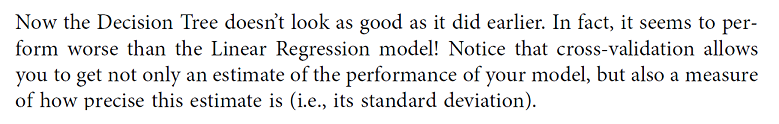

In [51]:
# Lets see our last model, Random Forest
# Random Forests work by training many Decision Trees on random subsets of the features,
# then averaging out their predictions.

from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(train_prepared, train_labels)

RandomForestRegressor(random_state=42)

In [52]:
train_pred = forest_model.predict(train_prepared)

forest_rmse = mean_squared_error(train_labels, train_pred, squared=False)
forest_mae = mean_absolute_error(train_labels, train_pred)

print("Root Mean Squared Error of Forest Model :", forest_rmse)
print("Mean Absolute Error of Forest Model :", forest_mae)

Root Mean Squared Error of Forest Model : 18168.271801354007
Mean Absolute Error of Forest Model : 11598.41768531977


In [53]:
scores = cross_val_score(forest_model,
                         train_prepared,
                         train_labels,
                         scoring="neg_mean_squared_error",
                         cv=10)

forest_rmse_scores = np.sqrt(-scores)

print("Scores:", forest_rmse_scores)
print("Mean:", forest_rmse_scores.mean())
print("Standard deviation:", forest_rmse_scores.std())

Scores: [51921.31508695 48978.53478788 48508.78483053 47969.85271547
 51955.1971719  48886.10940164 47504.39404301 48080.33478197
 50333.34424338 44269.51836672]
Mean: 48840.7385429459
Standard deviation: 2134.6531869447626


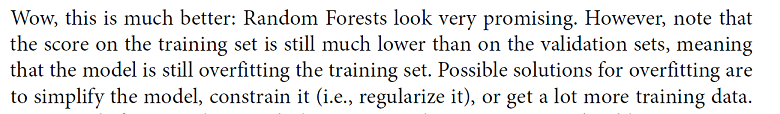

## Evaluate Your System on the Test Set

In [54]:
# Finally it is time to launch the test set and get the accuracy of our model

final_model = forest_model

test_features = test_set.drop("median_house_value", axis=1)     # Testing feature
test_labels = test_set["median_house_value"].copy()             # Testing label

test_prepared = pre_pipe.transform(test_features)
final_pred = final_model.predict(test_prepared)

final_rmse = mean_squared_error(test_labels, final_pred, squared=False)
final_rmse

47664.30642202534

We can compute a 95% confidence interval for the test RMSE:

In [55]:
from scipy import stats

confidence = 0.95
squared_errors = (final_pred - test_labels) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45439.98534913, 49789.35573851])

## Model persistence using joblib

Using `joblib`, we can save and load any model with its all parameters intact. It will help by saving time and computation of repeatedly training out model.

In [56]:
# First create a full pipeline containing previous pipeline as well as the model

full_pipe = Pipeline([
    ("preparation", pre_pipe),
    ("linear", RandomForestRegressor(n_estimators=100, random_state=42))
])

full_pipe.fit(train_features, train_labels)

Pipeline(steps=[('preparation',
                 Pipeline(steps=[('fillna', fill_median(col='total_bedrooms')),
                                 ('attribs_adder', add_features()),
                                 ('onehot', onehot(col='ocean_proximity')),
                                 ('Standard_scaling', StandardScaler())])),
                ('linear', RandomForestRegressor(random_state=42))])

In [57]:
# Now we can preform pre processing on unseen data as well as prediction using 
# literally one line of code. predict() function actually performs transform()
# operation on all pipeline stages.
test_pred = full_pipe.predict(test_features)
test_pred

array([136129., 256621., 137677., ..., 122217., 243449., 172755.])

In [58]:
# At the end, this full pipeline is actually the whole machine learning end to end
# model which also contains all the trained features.
my_model = full_pipe

In [59]:
import joblib

# To save the file in a pickle object
joblib.dump(my_model, "my_model.pkl")


# In later stage, to load a pickle file
my_model_loaded = joblib.load("my_model.pkl")
my_model_loaded

Pipeline(steps=[('preparation',
                 Pipeline(steps=[('fillna', fill_median(col='total_bedrooms')),
                                 ('attribs_adder', add_features()),
                                 ('onehot', onehot(col='ocean_proximity')),
                                 ('Standard_scaling', StandardScaler())])),
                ('linear', RandomForestRegressor(random_state=42))])